In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
df= pd.read_csv("SMS-Messages.csv")
df.head()
df.info()

,Message,Class_Label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,'Go until jurong point,ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'Ok lar... Joking wif u oni...',ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'U dun say so early hor... U c already then sa...,ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'Nah I don\'t think he goes to usf,ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
Message        200 non-null object
Class_Label    200 non-null object
Unnamed: 2     13 non-null object
Unnamed: 3     5 non-null object
Unnamed: 4     1 non-null object
Unnamed: 5     1 non-null object
Unnamed: 6     1 non-null object
Unnamed: 7     1 non-null object
Unnamed: 8     1 non-null object
Unnamed: 9     1 non-null object
Unnamed: 10    1 non-null object
dtypes: object(11)
memory usage: 17.3+ KB


In [4]:
df.columns

Index(['Message', 'Class_Label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [5]:
df.columns.get_values()[1]

'Class_Label'

In [6]:
df1 = df.loc[:,['Message','Class_Label']]

In [7]:
df1.groupby('Class_Label').count()

,Message
Class_Label,
ham,167
spam,33


In [8]:
#Removing short words having length of three
df1['Message'] = df1['Message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
#Converting all letters into lower case NORMLIZATION
df1['Message'] = df1['Message'].astype(str).str.lower()

In [10]:
df1.head()

,Message,Class_Label
0,until jurong point,ham
1,lar... joking oni...',ham
2,'free entry wkly comp final tkts 21st 2005. te...,spam
3,early hor... already then say...',ham
4,'nah don\'t think goes,ham


In [11]:
df1.tail()

,Message,Class_Label
195,'how doing? hope you\'ve settled school year. ...,ham
196,'gud mrng dear nice day',ham
197,'did that persons story',ham
198,your hamster dead? meet orchard mrt?,ham
199,kate your evening? hope tomorrow have bloody b...,ham


In [12]:
#Dumming Coding
df1['Class_Label']= df1['Class_Label'].map({'ham':0,'spam':1}).astype(int)

In [142]:
#Shuffling rows of the dataframe
df2 = df1.reindex(np.random.permutation(df1.index))
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 70 to 132
Data columns (total 2 columns):
Message        200 non-null object
Class_Label    200 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [15]:
df2.head()

,Message,Class_Label
63,'sorry roommates took forever,0
68,"'did hear about ""divorce barbie""? comes with k...",1
42,'07732584351 rodger burns tried call your repl...,1
124,going today. will done only,0
104,'wow. you\'re right! didn\'t mean that. guess ...,0


In [14]:
df2.tail()

,Message,Class_Label
98,'hi. been hols now! run. forgot that have hair...,0
77,like peoples very much:) very pa.',0
173,'what time coming down later?,0
127,'just that know,0
192,'i\'m sorry. i\'ve joined league people that d...,0


In [154]:
# To split the data set in to parts
train=df2.sample(frac=0.7,random_state=2)
test=df2.drop(train.index)

In [155]:
train.shape
test.shape

(140, 2)

(60, 2)

In [156]:
train_list = train.values.tolist()
train_list[0:4]
len(train_list)

[['\'hi. been hols now! run. forgot that have hairdressers appointment four need home shower beforehand. does that cause prob u?"‘',
  0],
 ["'pls ahead with watts. just wanted sure. have great weekend. abiola'", 0],
 ["'fine that\\'s feel. that\\'s gota", 0],
 ["'dear", 0]]

140

In [157]:
test_list = test.values.tolist()
test_list[0:4]
len(test_list)

[["predict time ü\\'ll finish buying?'", 0],
 ["'please call customer service representative 0800 6031 between 10am-9pm have guaranteed £1000 cash £5000 prize!'",
  1],
 ["'yeah hopefully", 0],
 ["'first answer question.'", 0]]

60

In [158]:
#Tokenization
tokenized_train = train['Message'].apply(lambda x: x.split())
tokenized_train.head()
len(tokenized_train)

98     ['hi., been, hols, now!, run., forgot, that, h...
40     ['pls, ahead, with, watts., just, wanted, sure...
18                ['fine, that\'s, feel., that\'s, gota]
132                                              ['dear]
25     ['just, forced, myself, slice., i\'m, really, ...
Name: Message, dtype: object

140

In [159]:
#Tokenization
tokenized_test = test['Message'].apply(lambda x: x.split())
tokenized_test.head()
len(tokenized_test)

125             [predict, time, ü\'ll, finish, buying?']
93     ['please, call, customer, service, representat...
48                                    ['yeah, hopefully]
133                         ['first, answer, question.']
171                                               ['sir]
Name: Message, dtype: object

60

In [160]:
tokenized_message_train = tokenized_train.tolist()
tokenized_message_train[0:4]

[["'hi.",
  'been',
  'hols',
  'now!',
  'run.',
  'forgot',
  'that',
  'have',
  'hairdressers',
  'appointment',
  'four',
  'need',
  'home',
  'shower',
  'beforehand.',
  'does',
  'that',
  'cause',
  'prob',
  'u?"‘'],
 ["'pls",
  'ahead',
  'with',
  'watts.',
  'just',
  'wanted',
  'sure.',
  'have',
  'great',
  'weekend.',
  "abiola'"],
 ["'fine", "that\\'s", 'feel.', "that\\'s", 'gota'],
 ["'dear"]]

In [161]:
tokenized_message_test = tokenized_test.tolist()
tokenized_message_test[0:4]

[['predict', 'time', "ü\\'ll", 'finish', "buying?'"],
 ["'please",
  'call',
  'customer',
  'service',
  'representative',
  '0800',
  '6031',
  'between',
  '10am-9pm',
  'have',
  'guaranteed',
  '£1000',
  'cash',
  '£5000',
  "prize!'"],
 ["'yeah", 'hopefully'],
 ["'first", 'answer', "question.'"]]

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=32, stop_words='english')
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(train['Message'])

In [169]:
tfidf_test = tfidf_vectorizer.fit_transform(test['Message'])

In [170]:
train_x = tfidf_train 
train_y = train['Class_Label']

In [171]:
test_x = tfidf_test
test_y = test['Class_Label']

In [172]:
train_x .shape
train_y.shape
test_x.shape
test_y.shape

(140, 32)

(140,)

(60, 32)

(60,)

In [173]:
train.groupby('Class_Label').count()

,Message
Class_Label,
0,116
1,24


In [174]:
test.groupby('Class_Label').count()

,Message
Class_Label,
0,51
1,9


In [175]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
# Fitting the model
model = MultinomialNB()
model.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [176]:
classes = model.predict(test_x)

In [177]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score

In [178]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.866666666667
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.89      0.96      0.92        51
          1       0.60      0.33      0.43         9

avg / total       0.85      0.87      0.85        60

AUC


0.64705882352941169

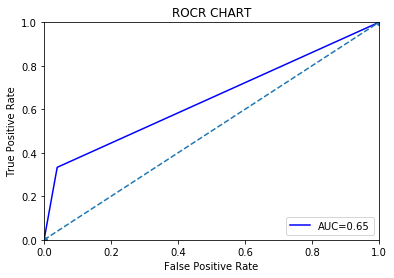

In [179]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


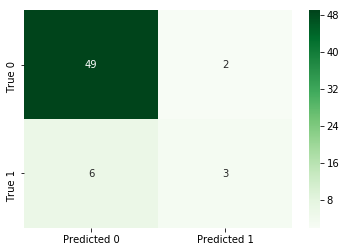

In [180]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [181]:
lex_file = pd.read_csv("AFINN-111.csv", sep=',', engine='python')

In [182]:
lex_file.head()

,words,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [183]:
type(lex_file)

pandas.core.frame.DataFrame

In [184]:
#Converting dataframe into dictionary
lexicons = dict(zip(lex_file.words,lex_file.score))

In [185]:
print(lexicons)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [186]:
lexicons["abandon"]

-2

In [187]:
#lexicons = {}
#records = lex_file.readlines()
#for record in lex_file:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) # to remove new line charecter
    #lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
#print(lexicons)
#lexicons["abandon"]

In [188]:
#Get the columns of data
class_label= []
corpus = []
for record in test_list :
    corpus.append(record[0])
    class_label.append(record[1])
print(corpus)
print(class_label)

["predict time ü\\'ll finish buying?'", "'please call customer service representative 0800 6031 between 10am-9pm have guaranteed £1000 cash £5000 prize!'", "'yeah hopefully", "'first answer question.'", "'sir", "'did catch frying make tea? eating your mom\\'s left over dinner feel love", 'going today. will done only', 'entered cabin said', "'wow. never realized that were embarassed your accomodations. thought liked", '\'did hear about "divorce barbie"? comes with ken\\\'s stuff!\'', "know what mallika sherawat yesterday? find &lt;url&gt;'", 'babe home wanna something?', "'gud mrng dear nice day'", 'valued customer', "letter car'", "will stop itself. however suggest stays with someone that will able give every stool.'", "'yeah don\\'t stand close tho- you\\'ll catch something!'", "'fair enough", "'okay name price long legal! pick them", '', "'are unique enough? find from 30th august. www.areyouunique.co.uk'", "don\\'t know stubborn didn\\'t even want hospital. kept telling mark i\\'m we

In [189]:
#For each tweet
#For each word in tweet
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for tweet in tokenized_message_test:
    score = 0
    for word in tweet:
        if word in lexicons:
            score = score + lexicons[word]
    strength.append(score)
    if (score >= 0 ):
        prediction.append('ham')
    else:
        prediction.append('spam')
print(strength)
print(prediction)

[0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 5, 0, 0, -1, 0, 0, 0, 0, 0, -5, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, -3, 1, 0, -3, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 2, -1, 0, 0]
['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham']


In [190]:
corpus_list = {'data':corpus}
labels = {'label':class_label}
senti_strength = {'senti_strength':strength}

In [191]:
#Create an Analysis Base Table (ABT)
senti_matrix = pd.DataFrame(corpus_list, strength)
senti_matrix['Label'] = class_label
senti_matrix['prediction']=prediction

In [192]:
senti_matrix[0:5]

,data,Label,prediction
0,predict time ü\'ll finish buying?',0,ham
0,'please call customer service representative 0...,1,ham
2,'yeah hopefully,0,ham
0,'first answer question.',0,ham
0,'sir,0,ham


In [193]:
senti_matrix.pivot_table(index = ['prediction', 'Label'], aggfunc = 'count')

data
prediction Label      
ham        0        47
           1         8
spam       0         4
           1         1

#TextBlob Naive Bayes Classifier

In [194]:
test_list = list(map(tuple,test.values))
test_list[0:4]

[("predict time ü\\'ll finish buying?'", 0),
 ("'please call customer service representative 0800 6031 between 10am-9pm have guaranteed £1000 cash £5000 prize!'",
  1),
 ("'yeah hopefully", 0),
 ("'first answer question.'", 0)]

In [195]:
train_list = list(map(tuple,train.values))
train_list[0:4]

[('\'hi. been hols now! run. forgot that have hairdressers appointment four need home shower beforehand. does that cause prob u?"‘',
  0),
 ("'pls ahead with watts. just wanted sure. have great weekend. abiola'", 0),
 ("'fine that\\'s feel. that\\'s gota", 0),
 ("'dear", 0)]

In [196]:
from textblob.classifiers import NaiveBayesClassifier

In [197]:
len(train_list)
len(test_list)

140

60

In [198]:
cl = NaiveBayesClassifier(train_list)

In [199]:
cl.accuracy(train_list)

0.9642857142857143

In [200]:
cl.accuracy(test_list)

0.9

In [201]:
cl.show_informative_features(40)

Most Informative Features
          contains(free) = True                1 : 0      =     20.3 : 1.0
        contains(please) = True                1 : 0      =     14.0 : 1.0
          contains(cash) = True                1 : 0      =     10.9 : 1.0
          contains(text) = True                1 : 0      =      8.4 : 1.0
       contains(waiting) = True                1 : 0      =      7.8 : 1.0
          contains(week) = True                1 : 0      =      7.8 : 1.0
          contains(more) = True                1 : 0      =      7.8 : 1.0
         contains(speak) = True                1 : 0      =      7.8 : 1.0
       contains(contact) = True                1 : 0      =      7.8 : 1.0
          contains(call) = True                1 : 0      =      7.2 : 1.0
         contains(reply) = True                1 : 0      =      6.6 : 1.0
          contains(from) = True                1 : 0      =      6.6 : 1.0
          contains(miss) = True                1 : 0      =      4.7 : 1.0